<a href="https://colab.research.google.com/github/Nandavardhan0798/Airline-Reservation-System/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nandavardhan56","key":"3cdd5c3ddc24159a449cda14dbf6b7e0"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list -s "Customer Segmentation using Clustering"

ref                                                          title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
vishakhdapat/customer-segmentation-clustering                Customer Segmentation : Clustering                      63448  2024-01-13 16:31:02.763000           6310         50  0.9411765        
aryashah2k/credit-card-customer-data                         Credit Card Customer Data                                6431  2021-05-15 08:59:46.190000          10691         77  1.0              
vjchoudhary7/customer-segmentation-tutorial-in-python        Mall Customer Segmentation Data                          1583  2018-08-11 07:23:02.830000         241722       1827  0.88235295       
krishnaraj30/mall-vi

In [8]:
!kaggle datasets download -d vishakhdapat/customer-segmentation-clustering

Dataset URL: https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering
License(s): apache-2.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 133MB/s]


In [9]:
!unzip customer-segmentation-clustering.zip

Archive:  customer-segmentation-clustering.zip
  inflating: customer_segmentation.csv  


In [10]:
import pandas as pd
df = pd.read_csv("/content/customer_segmentation.csv")

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [26]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


<Axes: >

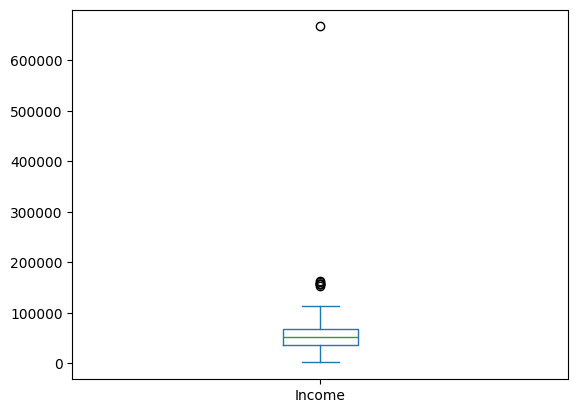

In [28]:
import matplotlib.pyplot as plt
df['Income'].plot(kind='box')

In [24]:
df["Income"] = df["Income"].fillna(df["Income"].median())

In [29]:
df.duplicated().sum()

np.int64(0)

In [32]:
features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome',
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth', 'Education', 'Marital_Status']

In [33]:
df = df[features]

In [34]:
df.dtypes

,0
Year_Birth,int64
Income,float64
Kidhome,int64
Teenhome,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64
MntGoldProds,int64


In [35]:
categorical_features = ['Education', 'Marital_Status']
numeric_features = list(set(features) - set(categorical_features))

In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=
 [
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [44]:
X_processed = preprocessor.fit_transform(df)

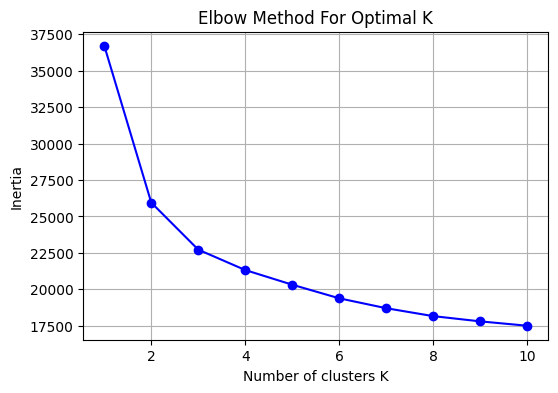

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()


In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_processed)

df['Cluster'] = clusters  # Add cluster label to original data


In [55]:
df.groupby('Cluster')[['Income', 'MntWines', 'MntMeatProducts', 'NumWebPurchases']].mean()

,Income,MntWines,MntMeatProducts,NumWebPurchases
Cluster,,,,
0,57810.409163,464.872038,132.334913,6.241706
1,76474.055085,586.508475,452.818644,5.222034
2,34709.324975,39.834808,22.651917,2.082596


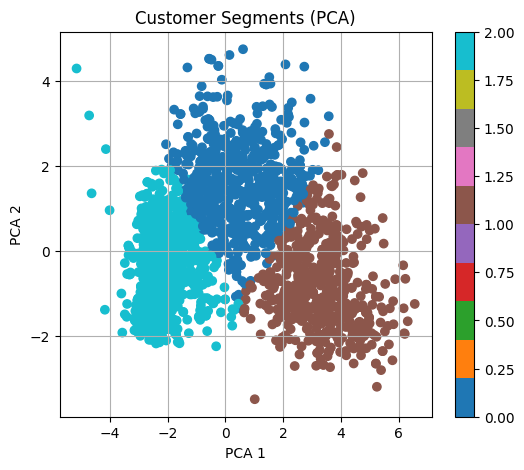

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='tab10')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments (PCA)')
plt.colorbar()
plt.grid(True)
plt.show()


In [58]:
cluster_summary = df.groupby('Cluster').agg({
    'Income': 'mean',
    'MntWines': 'mean',
    'MntMeatProducts': 'mean',
    'MntGoldProds': 'mean',
    'NumWebPurchases': 'mean',
    'NumCatalogPurchases': 'mean'
})

print(cluster_summary)


               Income    MntWines  MntMeatProducts  MntGoldProds  \
Cluster                                                            
0        57810.409163  464.872038       132.334913     59.812006   
1        76474.055085  586.508475       452.818644     77.033898   
2        34709.324975   39.834808        22.651917     15.042281   

         NumWebPurchases  NumCatalogPurchases  
Cluster                                        
0               6.241706             3.006319  
1               5.222034             5.961017  
2               2.082596             0.533923  


<Axes: xlabel='Cluster', ylabel='MntWines'>

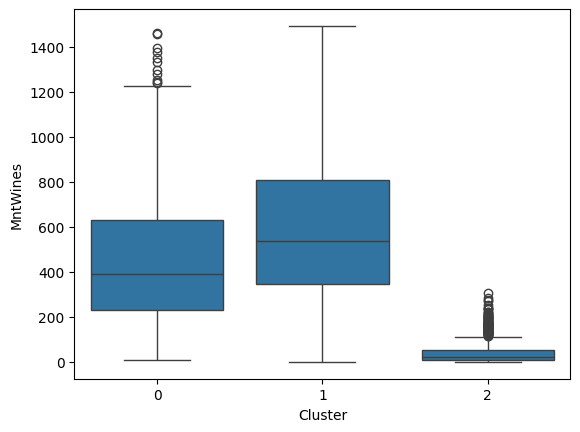

In [59]:
import seaborn as sns
sns.boxplot(x='Cluster', y='MntWines', data=df)


<Axes: xlabel='Income', ylabel='MntWines'>

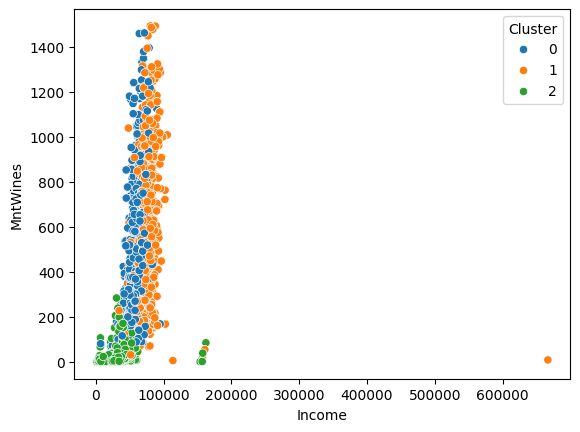

In [60]:
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Cluster', palette='tab10')

In [61]:
df.to_csv("clustered_customers.csv", index=False)